In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.express as px
import os
import cv2
import pickle
import itertools
import tensorflow as tf
import pydot
import graphviz

import keras
import tensorflow


from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils.vis_utils import plot_model

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = "/content/drive//MyDrive/soil samples dataset/Image dataset/Train"
test_path = "/content/drive//MyDrive/soil samples dataset/Image dataset/test"

Alluvial soil


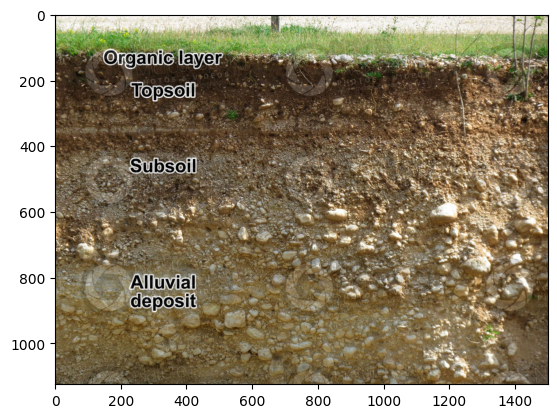

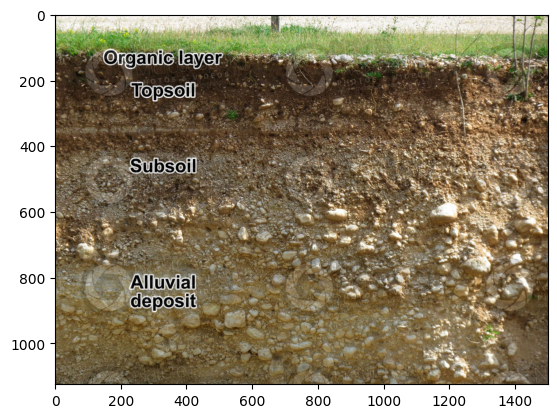

Red soil


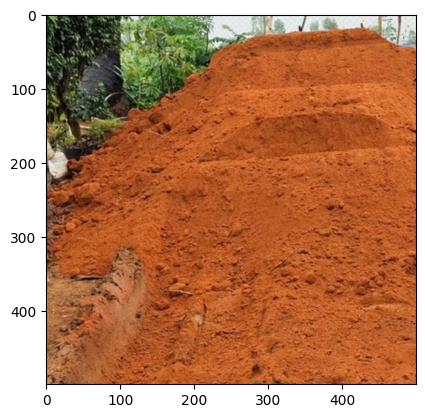

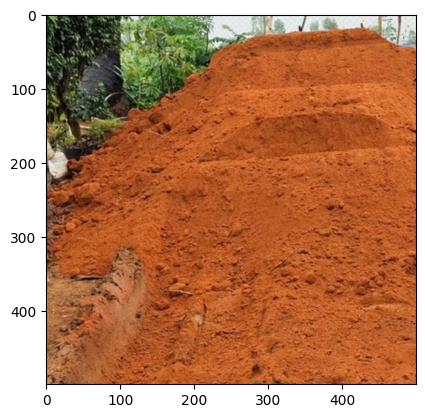

Clay soil


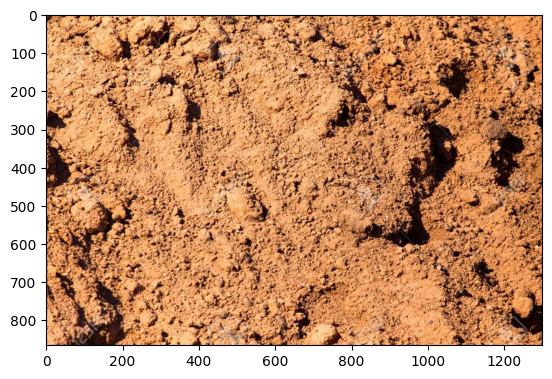

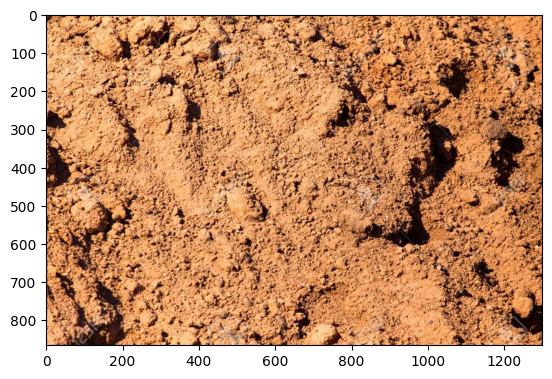

Black soil


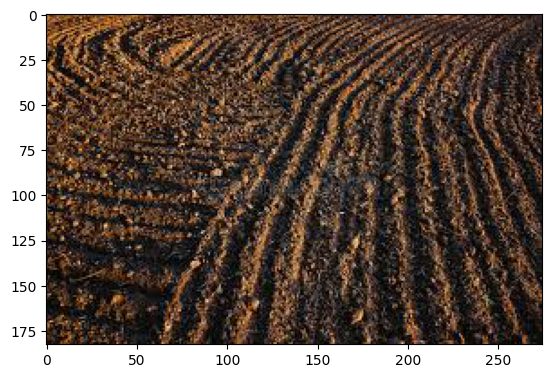

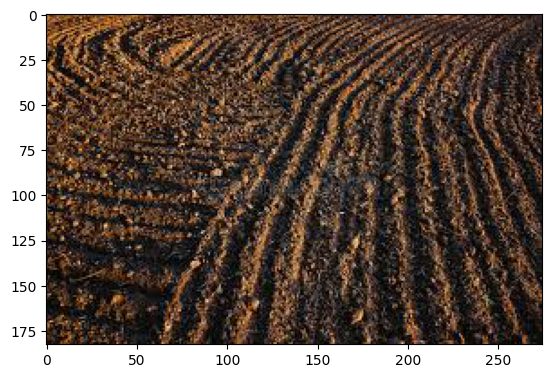

In [ ]:
for folder in os.listdir(test_path):
  sub_path = train_path +'/'+ folder

  print(folder)
  for i in range(2):
    temp_path = os.listdir(sub_path)[1]
    temp_path = sub_path +'/'+ temp_path
    img = mpimg.imread(temp_path)
    implot = plt.imshow(img)
    plt.show()

In [ ]:
def imagearray(path, size):
  data = []
  for folder in os.listdir(path):
    sub_path = path + "/" + folder

    for img in os.listdir(sub_path):
      image_path = sub_path + "/" + img
      img_arr = cv2.imread(image_path)
      img_arr = cv2.resize(img_arr, size)
      data.append(img_arr)
  return data

In [ ]:
size = (250, 250)

In [ ]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)


In [ ]:
x_train = np.array(train)
x_test = np.array(test)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
print("x_train_shape", x_train.shape,
      "x_test_shape", x_test.shape)

x_train_shape (868, 250, 250, 3) x_test_shape (341, 250, 250, 3)


In [ ]:
def data_class(data_path, size, class_mode):
  datagen = ImageDataGenerator(rescale = 1./255)
  classes = datagen.flow_from_directory(data_path,
                                        target_size = size,
                                        batch_size = 32,
                                        class_mode = class_mode)
  return classes

In [ ]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')

Found 868 images belonging to 4 classes.
Found 341 images belonging to 4 classes.


In [ ]:
y_train = train_class.classes
y_test = test_class.classes

In [ ]:
train_class.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
train_class.class_indices

{'Alluvial soil': 0, 'Black soil': 1, 'Clay soil': 2, 'Red soil': 3}

In [ ]:
print("y_train_shape", y_train.shape,
      "y_test_shape", y_test.shape)

y_train_shape (868,) y_test_shape (341,)


In [ ]:
y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)

# **VGG19 Model**

In [ ]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
num_classes = 4

x = Flatten()(vgg.output)
prediction = Dense(num_classes, activation = 'sigmoid')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 250, 250, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 250, 250, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 125, 125, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 125, 125, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 125, 125, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 62, 62, 128)       0   

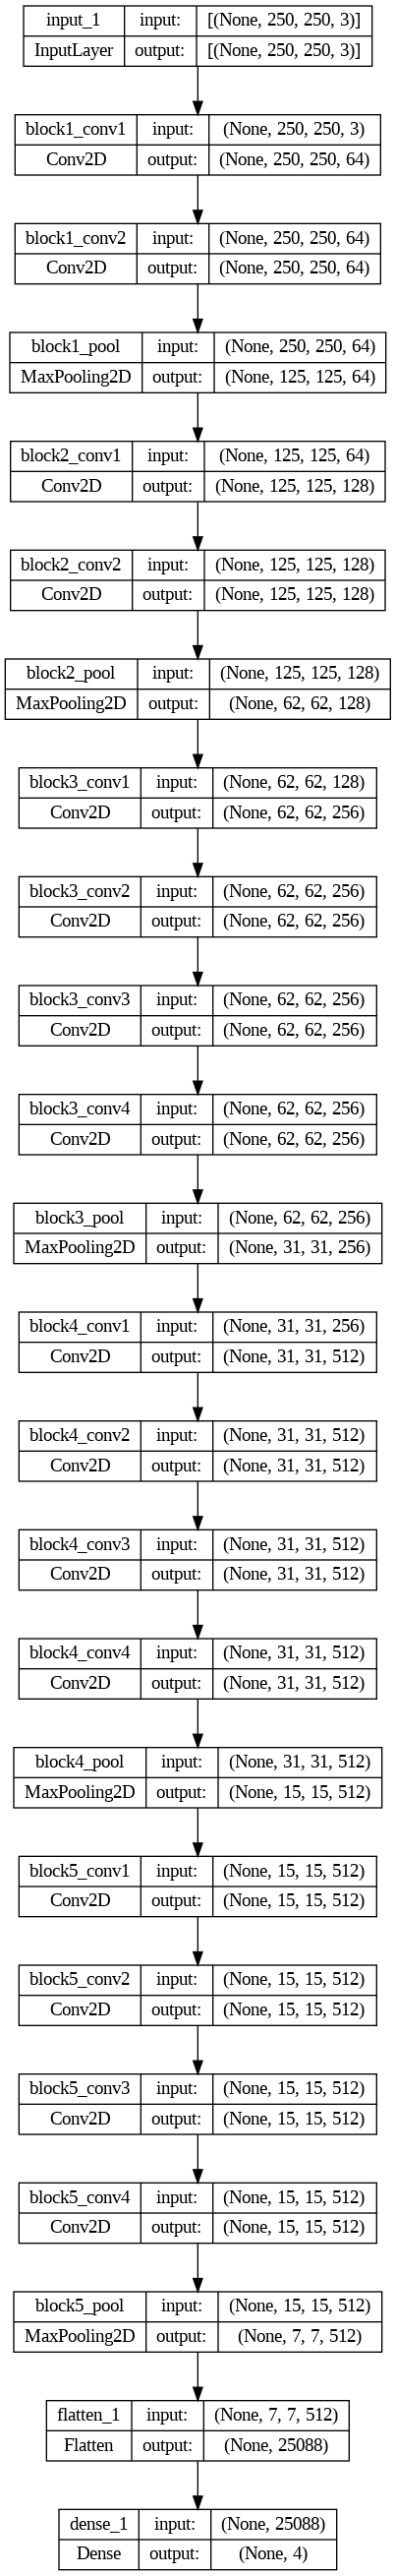

In [ ]:
plot_model(model = model, show_shapes = True)

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.1, epochs = 10, callbacks = [early_stop], batch_size = 30, shuffle = True)

Epoch 1/10
27/27 [==============================] - 45s 2s/step - loss: 0.0696 - accuracy: 0.9667 - val_loss: 0.0942 - val_accuracy: 0.9540
Epoch 2/10
27/27 [==============================] - 45s 2s/step - loss: 0.0704 - accuracy: 0.9693 - val_loss: 0.0820 - val_accuracy: 0.9770
Epoch 3/10
27/27 [==============================] - 44s 2s/step - loss: 0.0623 - accuracy: 0.9718 - val_loss: 0.0896 - val_accuracy: 0.9770
Epoch 4/10
27/27 [==============================] - 44s 2s/step - loss: 0.0580 - accuracy: 0.9770 - val_loss: 0.0999 - val_accuracy: 0.9425
Epoch 5/10
27/27 [==============================] - 45s 2s/step - loss: 0.0567 - accuracy: 0.9718 - val_loss: 0.1124 - val_accuracy: 0.9195
Epoch 6/10
27/27 [==============================] - 45s 2s/step - loss: 0.0552 - accuracy: 0.9731 - val_loss: 0.0521 - val_accuracy: 1.0000
Epoch 7/10
27/27 [==============================] - 45s 2s/step - loss: 0.0510 - accuracy: 0.9744 - val_loss: 0.0436 - val_accuracy: 1.0000
Epoch 8/10
27/27 [==

# **Accuracy** **Test**   

**Visualization**

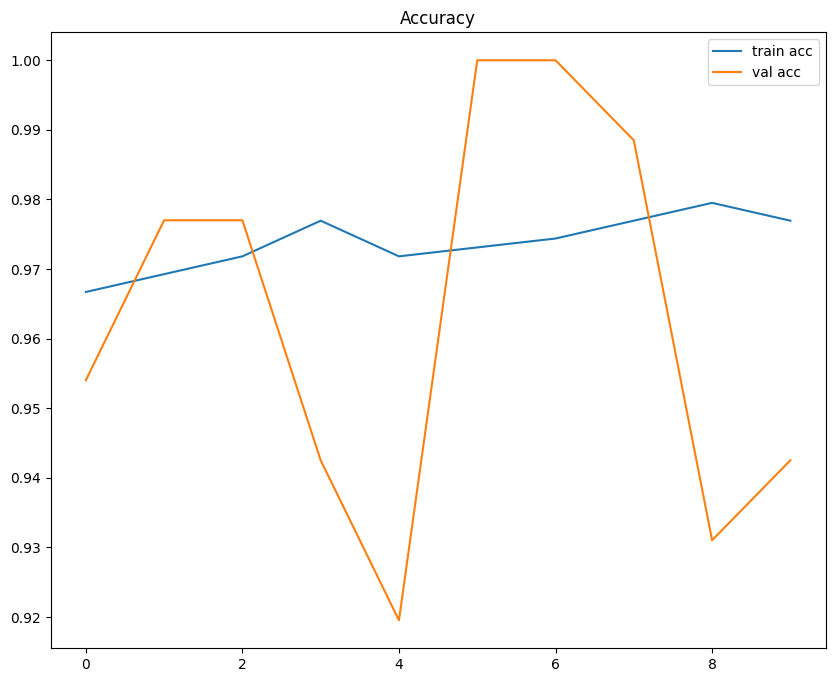

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

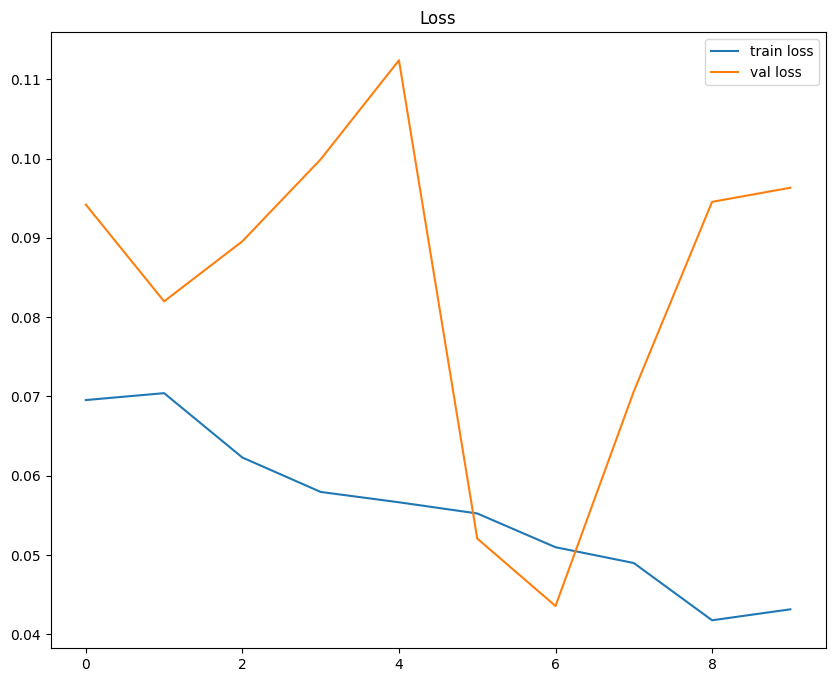

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

# **Model Evaluation**

In [ ]:
model.evaluate(x_test, y_test, batch_size=32)

11/11 [==============================] - 18s 2s/step - loss: 0.1720 - accuracy: 0.9238


[0.17200107872486115, 0.9237536787986755]

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# load your test data and the predictions of the CNN model
y_pred = model.predict(x_test) # shape: (num_samples,)

# convert probabilities to class labels (0 or 1) based on a threshold of 0.5
y_pred = np.round(y_pred).astype(int)

# calculate precision, recall, and F1 score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='samples')

# print the results
print('Precision:', precision)
print('Sensitivity:', recall)
print('F1 score:', f1_score)

11/11 [==============================] - 18s 2s/step
Precision: 0.9046920821114369
Sensitivity: 0.9090909090909091
F1 score: 0.906158357771261


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11/11 [==============================] - 18s 2s/step


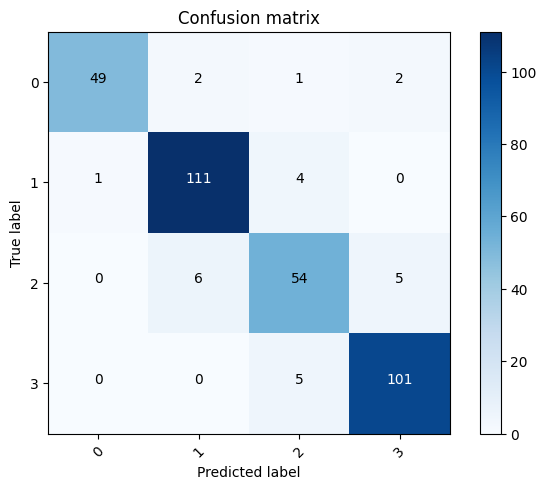

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)


# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(4))